# **Author : Pallavi Gawari**
**THE SPARK FOUNDATION INTERNSHIP : GRIPSEPTEMBER21**

**Task 1 : Prediction using Supervised Machine Learning**

AIM - To Predict the percentage of marks of the students based on the number of study hours.

**IMPORTNG REQUIRED LIBRARIES**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

READING DATA

In [4]:
data = pd.read_csv('http://bit.ly/w-data')
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


CHECK IF THERE IS ANY NULL VALUE IN THE DATASET

In [6]:
data.isnull == True

False

There is no null value in the Dataset.

EXPLORATORY DATA ANALYSIS

In [7]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [8]:
data.shape

(25, 2)

In [9]:
data.describe(include = 'all')

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [10]:
data.nunique()

Hours     23
Scores    23
dtype: int64

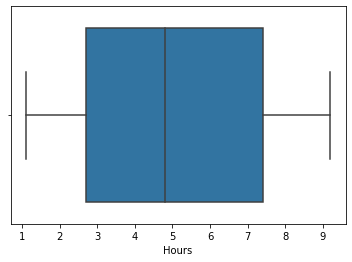

In [11]:
# Box Plots are used for outlier detection
sns.boxplot(data['Hours'])

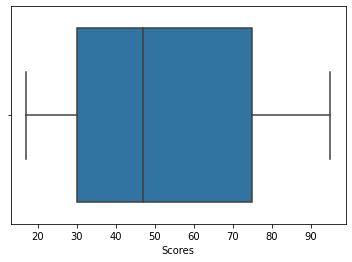

In [12]:
sns.boxplot(data['Scores'])

The boxplot indicates absence of outliers

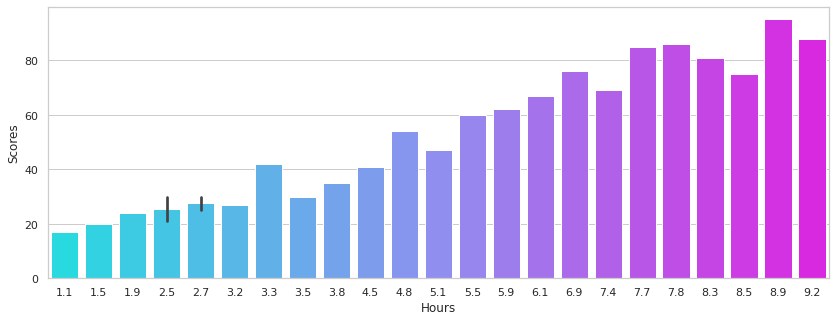

In [13]:
sns.set(style = 'whitegrid')
f , ax = plt.subplots(1,1, figsize = (14,5))
ax = sns.barplot(x = 'Hours', y = 'Scores', data = data, palette = 'cool')

The above graph highlights the scored attained by a student after studying for given no.of hours.

# **VISUALIZING THE DATA**

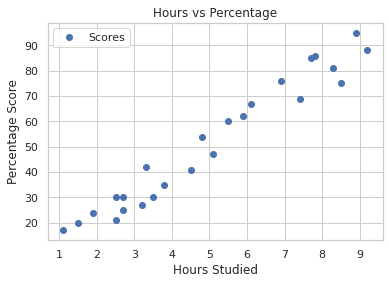

In [14]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  #title of paragraph
plt.xlabel('Hours Studied')  #label x axis
plt.ylabel('Percentage Score')  #label y axis
plt.show()


The graph above highlights that there exist a positive linear relationship between the number of hours studied and percentage score.



In [15]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


**DIVIDING THE DATA INTO ATTRIBUTES AND** **LABELS**

In [16]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values 
print("Values of X",X)
print("Values of y",y)

Values of X [[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
Values of y [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


Values of y [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]
# **SPLITTING DATA INTO TRAINING AND TEST SETS**

random_state will give the same training and test set everytime on running the code.

Using Scikit-Learn's built in train_test_split() method

In [17]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

**TRAIN THE** **ALGORITHM**

In [18]:
regression = LinearRegression()
regression.fit(X_train,y_train)
print("---------Model Trained---------")

---------Model Trained---------


**PREDICTING THE PERCENTAGE OF** **MARKS**

In [19]:
pred_y = regression.predict(X_test)
prediction = pd.DataFrame({'Hours': [i[0] for i in X_test], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.884145
1,3.2,33.732261
2,7.4,75.357018
3,2.5,26.794801
4,5.9,60.491033


**COMPARING THE PREDICTED MARKS WITH THE ACTUAL MARKS**

In [20]:
compare_scores = pd.DataFrame({'Actual Marks': y_test, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**VISUALLY COMPARING THE PREDICTED MARKS WITH THE ACTUAL MARKS**

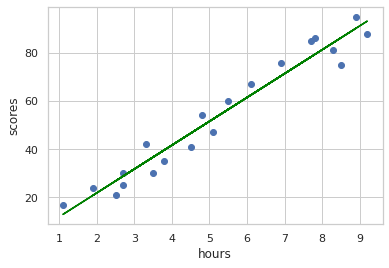

In [21]:
plt.scatter(X_train, y_train)
plt.plot(X_train,regression.predict(X_train),color='GREEN');
plt.xlabel("hours",fontsize=12)
plt.ylabel("scores",fontsize=12)
plt.show()

What will be predicted score if a student studies for 9.25 hrs/ day?

**EVALUATING THE MODEL**

In [22]:
print('The Training Score of the model is: ',regression.score(X_train,y_train))
print('The testing score of the model is: ',regression.score(X_test,y_test))

The Training Score of the model is:  0.9515510725211553
The testing score of the model is:  0.9454906892105354


In [23]:
print('Mean absolute error: ',mean_absolute_error(y_test,pred_y))

Mean absolute error:  4.183859899002982


Small value of Mean absolute error states that the chances of error or wrong forecasting through the model are very less.

WHAT WILL BE THE PREDICTED SCORE OF A STUDENT IF HE/SHE STUDIES FOR 9.25 HRS/DAY?

In [24]:
print("number of hours = 9.25") # Testing data - In Hours
y_predicted_value = regression.predict([[9.25]])
print("Score = {}".format(round(y_predicted_value[0],3)))

number of hours = 9.25
Score = 93.692


RESULT :

PREDICTED SCORE IF A STUDENTS STUDIES FOR 9.25 HOURS WILL BE 93.692 